In [1]:
import matplotlib.pyplot as plt
import alsDataManager
import sys  # to get arguments from terminal
import pandas as pd

input_arguments = ['', 'ads_xgboost_many_ts_merged.txt']  # TODO: SHOULD BE sys.args

if len(input_arguments) > 1:
    json_path = 'output/jsons/' + input_arguments[1]
#else:
#    json_path = 'non_bayesian_xgboost_keep10_vary_delete_threshold.txt'




d = alsDataManager.open_dict_from_json(json_path)
d = d['results']  # NOTE: remove this line if json is in old format




In [2]:


"""
@param d : dictionary of experiment result data
    first key: learning_method
    second key:
"""

keys1 = list(d.keys())  # assumed to be learning methods
keys2 = list(d[keys1[0]].keys())  # assumed to be row variation
keys3 = list(d[keys1[0]][keys2[0]].keys())  # assumed to be column variation
keys4 = list(d[keys1[0]][keys2[0]][keys3[0]].keys())  # assumed to be performance metrics

n_rows = len(keys2)
n_cols = len(keys3)

In [13]:
keys2 = list(d[keys1[3]].keys())  # assumed to be row variation
n_rows = len(keys2)
n_cols = len(keys3)

In [4]:
list(d[keys1[0]].keys())[0]  # assumed to be row variation

'certainty_ratio_threshold_50'

In [19]:
keys2_sorted = [
    'certainty_ratio_threshold_5',
    'certainty_ratio_threshold_25',
    'certainty_ratio_threshold_50',
    'certainty_ratio_threshold_75',
    'certainty_ratio_threshold_100',
    'certainty_ratio_threshold_250',
    'certainty_ratio_threshold_500',
    'certainty_ratio_threshold_750',
    'certainty_ratio_threshold_1000'
]
keys2 = keys2_sorted

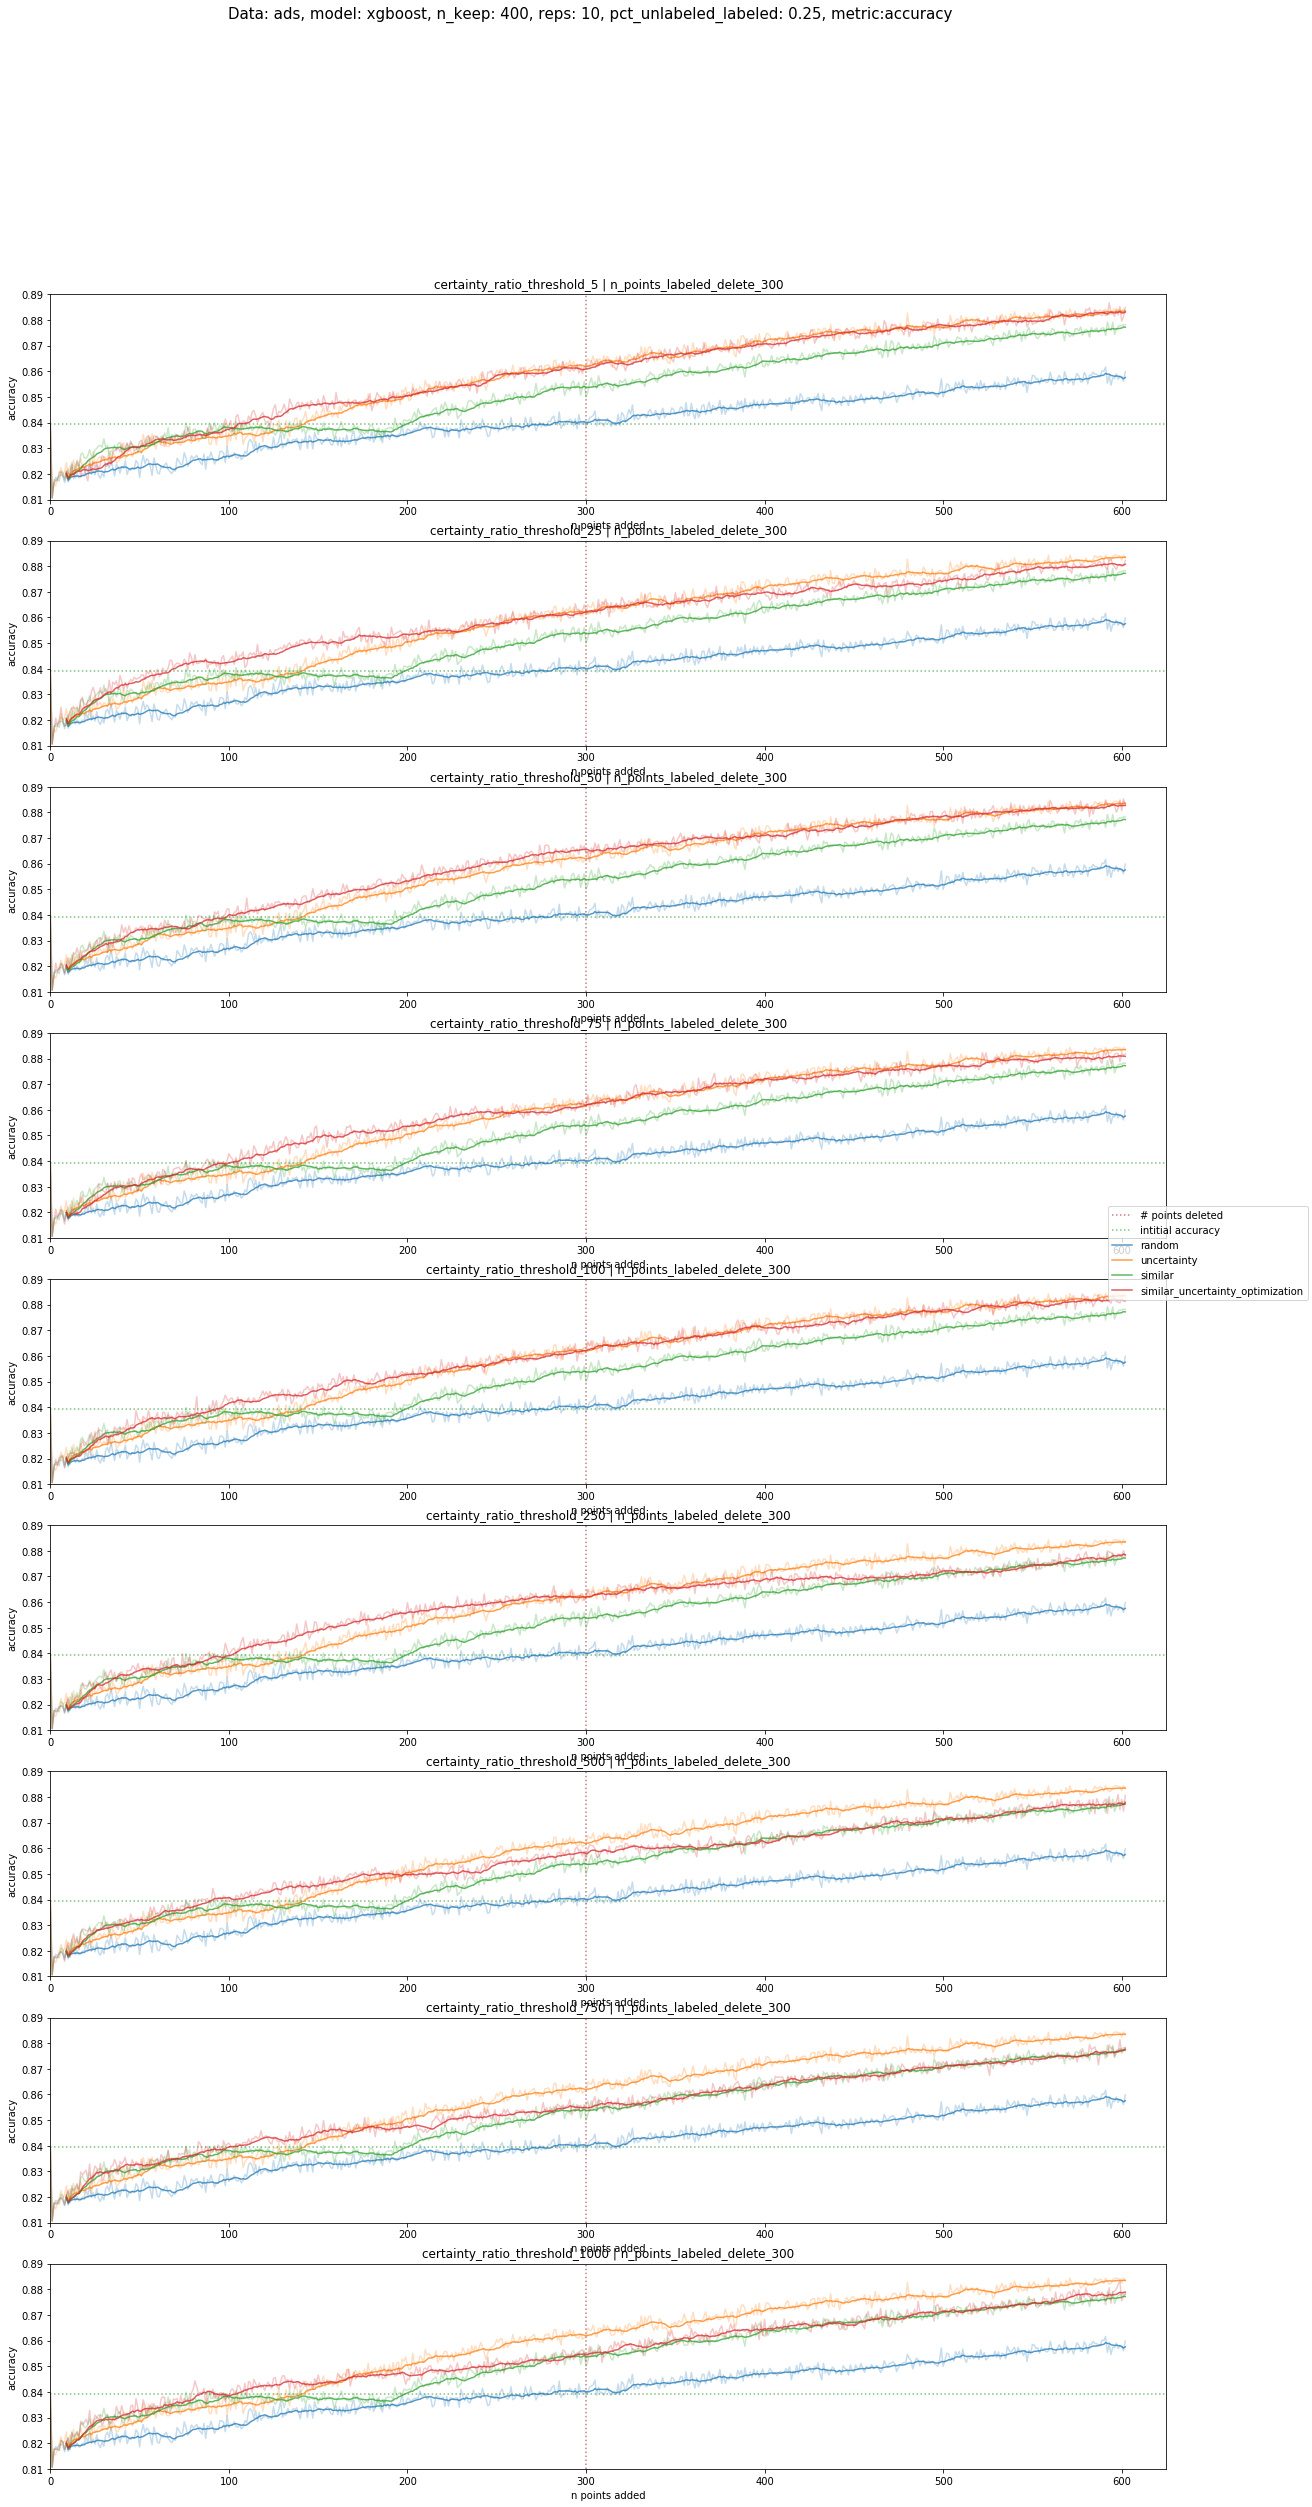

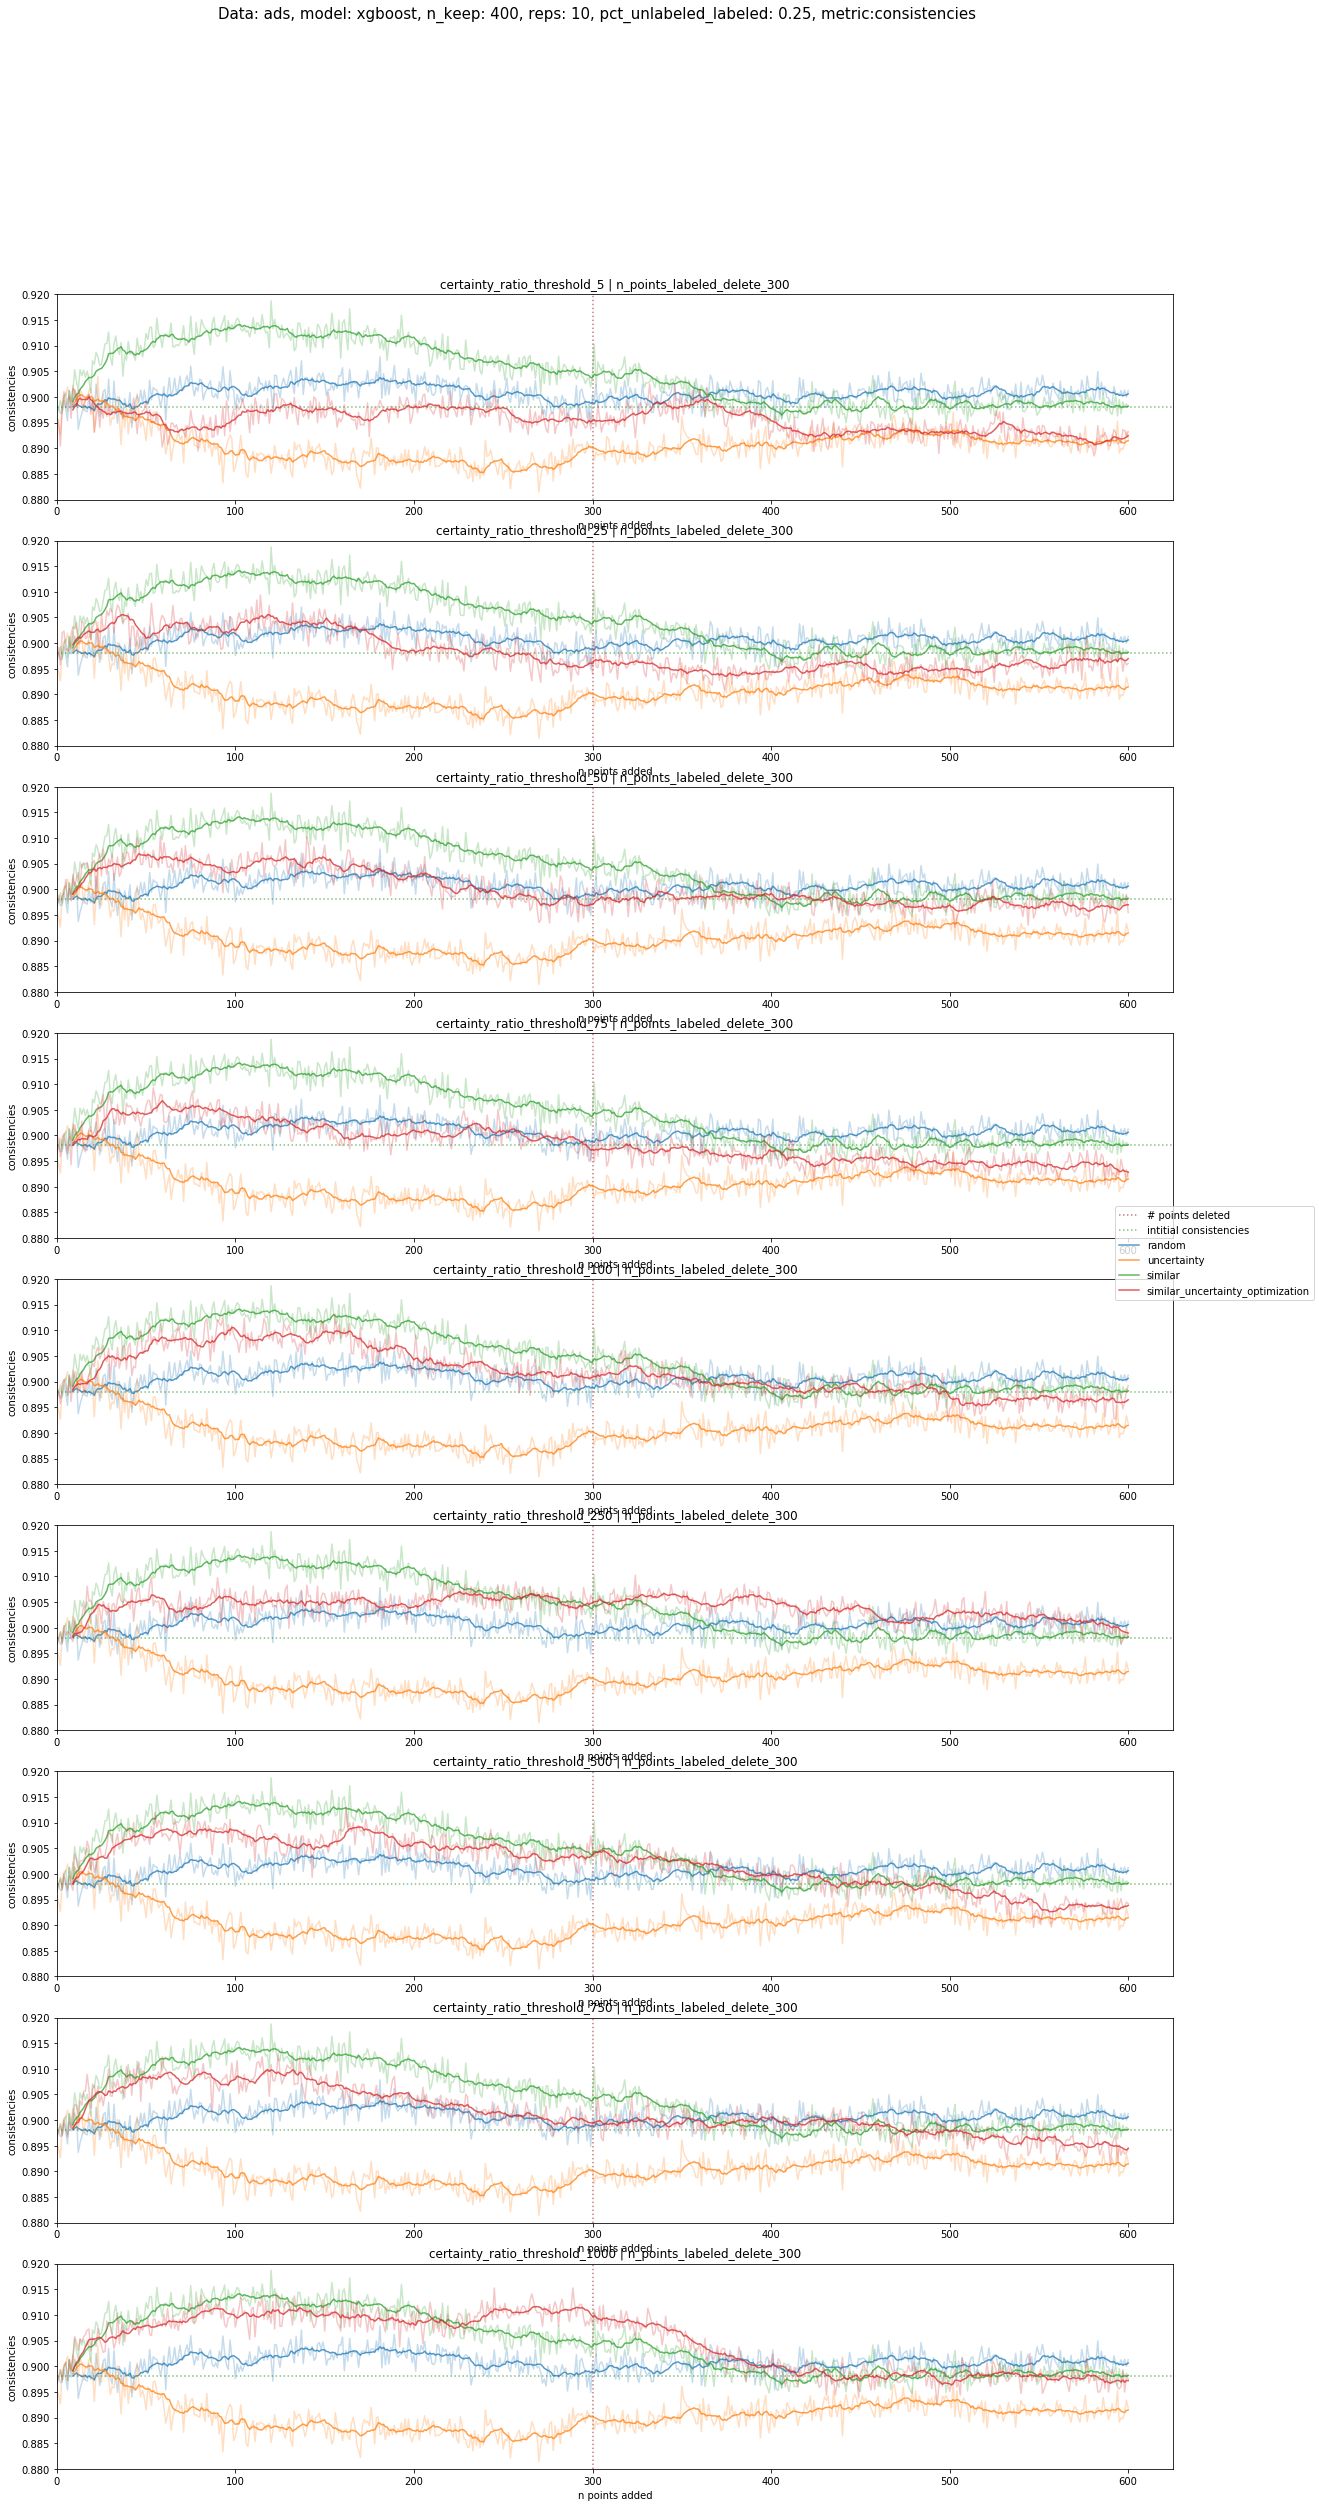

In [22]:

#print(n_rows)
#print(n_cols)
methods = keys1
metrics = ['accuracy', 'consistencies']
#metric = 'consistencies'  # keys4[0] #accuracy
max_x = 625
max_y = 0.92
min_y = 0.88

y_range_dict = {
    'accuracy' : [0.81, 0.89],
    'consistencies' : [0.88, 0.92]
}


N_DELETED = 300

for metric in metrics:
    TITLE_STR = 'Data: ads, model: xgboost, n_keep: 400, reps: 10, pct_unlabeled_labeled: 0.25, metric:' + metric

    min_y = y_range_dict[metric][0]
    max_y = y_range_dict[metric][1]

    save_path_name = 'output/plots/' + metric + '_plotted_' + input_arguments[1].split('.')[0] + '.png'

    fig, axs = plt.subplots(n_rows, n_cols)  # sharex=True, sharey=True)
    fig.set_size_inches(20, 40)

    grid_element_initialized = False

    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    color_dict = dict(zip(methods, colors[:len(methods)]))

    for i in range(n_rows):
        for j in range(n_cols):
            grid_element_initialized = False
            if n_rows > 1 and n_cols > 1:
                current_ax = axs[i, j]
            elif n_rows > 1:
                current_ax = axs[i]
            elif n_cols > 1:
                current_ax = axs[j]
            else:
                current_ax = axs

            for method in methods:
                if method != 'learning_method_similar_uncertainty_optimization':
                    threshold_key = list(d[keys1[0]].keys())[0]
                else:
                    threshold_key = keys2[i]

                if not grid_element_initialized:
                    #if 'delete' in keys2[0]:
                    #    n_deleted = int(keys2[i].split('_')[-1])  # get the number of deleted by splitting str
                    #elif 'delete' in keys3[0]:
                    #    n_deleted = int(keys3[j].split('_')[-1])  # get the number of deleted by splitting str
                    #else:
                    n_deleted = N_DELETED # TODO: alter this to be input parameter to plotting function

                    current_ax.set_xlim(0, max_x)
                    current_ax.set_ylim(min_y, max_y)

                    current_ax.axvline(x=n_deleted,
                                      color='maroon',
                                      alpha=0.5,
                                      label='# points deleted',
                                      linestyle='dotted')

                    current_ax.axhline(y=d[method][threshold_key][keys3[j]][metric][0],
                                      color='green',
                                      alpha=0.5,
                                      label='intitial ' + metric,
                                      linestyle='dotted')

                    grid_element_initialized = True

                try:
                    series = pd.Series(d[method][threshold_key][keys3[j]][metric])
                    series_rolling = series.rolling(10).mean()


                    current_ax.plot(series,
                                    label='_'.join(method.split('_')[2:]),
                                    alpha=0.25,
                                    color=color_dict[method])
                    current_ax.plot(series_rolling,
                                    label='_'.join(method.split('_')[2:]),
                                    alpha=0.75,
                                    color=color_dict[method])
                except KeyError:
                    pass


            title = keys2[i] + ' | ' + keys3[j]

            current_ax.set_title(title)


    if n_cols > 1 and n_rows > 1:
        # iterates over all subplots:
        for ax in axs.flat:
            ax.set(xlabel='n points added', ylabel=metric)
            # ax.grid()
        # ax.label_outer()  # hides x labels and tick labels for top plots and y ticks for right plots.
        handles, labels = axs[0, 0].get_legend_handles_labels()
    elif n_rows > 1:
        # iterates over all subplots:
        for ax in axs.flat:
            ax.set(xlabel='n points added', ylabel=metric)
            # ax.grid()
        # ax.label_outer()  # hides x labels and tick labels for top plots and y ticks for right plots.
        handles, labels = axs[0].get_legend_handles_labels()
    else:
        axs.set(xlabel='n points added', ylabel=metric)
        handles, labels = axs.get_legend_handles_labels()


    by_label = dict(zip(labels, handles))
    fig.legend(by_label.values(), by_label.keys(), loc='center right')

    fig.suptitle(TITLE_STR, fontsize=15)

    # fig.legend()
    fig.savefig(save_path_name, dpi=200)


In [2]:
import matplotlib.pyplot as plt
import alsDataManager
import sys  # to get arguments from terminal

#input_arguments = sys.argv
input_arguments = ['','xgboost_ads_single.txt']  # TODO: REMOVE

if len(input_arguments) > 1:
    json_path = 'output/jsons/' + input_arguments[1]
#else:
#    json_path = 'non_bayesian_xgboost_keep10_vary_delete_threshold.txt'



d = alsDataManager.open_dict_from_json(json_path)
#d = d['results']  # NOTE: remove this line if json is in old format